# 2nd lecture on python and sympy

In this lecture we'll continue exploring the functionalities of python and sympy. 
Here's the list of the topics you'll find in this notebook:

* control flow in python
* function calling inside loops
* 2D and 3D plotting with sympy
  * plots of functions
  * parametric plots
  * implicit plots
  * the hyperboloid as a ruled surface


## Control flow

One of the main advantages of programming is the ability to repeat some task automatically.
This can save you a lot of time, and automate your processes avoiding manual, boring and error-prone repetitions.

There are 3 tools you need to learn:

* **if-else** statements
* **for** loops
* **while** loops

### if-else

It may happen that you want some code to be executed only if some condition is satisfied, and some other code to be executed elsewise.
This mechanism is inspired on how humans think. For instance, let's consider the study of the stationary points of a function 
$$f : \mathbb{R} \to \mathbb{R}$$

The steps you learned are more or less the following:
* Evaluate the 1st derivative $f'(x)$
* Find the values $x_i$ for which it vanishes
* Study the $f''(x)$ at those points
* For each or those points check the following conditions:
  * **if** $f''(x_i) > 0$ it corresponds to a minimum
  * **else if** $f''(x_i) < 0$ it corresponds to a maximum
  * **else** $f''(x_i) = 0$, and you need to study $f^{(n)}(x_i) \quad n>2$ until the latter doesn't vanish at that point
  * When you find $n$ such that $f^{(n)}(x_i) \neq 0$
    - **if** $n$ is even, the point is a maximum or minimum
    - **else**, it is an inflection point
    
We've used if-else statements all over the previous list of instructions (and also some hidden for and while). Let's now see them in action with python.  
 
 


In [32]:
print("Boolean values can control the conditional execution of some piece of code:")
if 3>0:
  print("3 is greater than 0")
else:
  print("3 is less than 0")

Boolean values can control the conditional execution of some piece of code:
3 is greater than 0


In [33]:
a = 5
b= -6
if a>0 and b>0:
  print(a,"and", b, "are both positive")
elif a>0 and b<0:
  print(a, "is positive,", b, "is negative")
elif a<0 and b>0:
  print(b, "is positive,", a, "is negative")
elif a==0 or b==0:
  print(a, "or", b, "is 0")
else:
  print(a, "and", b, "are both negative")

5 is positive, -6 is negative


In [34]:
print("Now let's try with something non-trivial")
from datetime import date # module for date and time
today = date.today()
print("Today's date:", today)


Now let's try with something non-trivial
Today's date: 2021-01-04


In [1]:
print("ciao")

ciao


In [35]:
print("Note:", type(today), "is not a string")
AMD = str(today).split("-") # converting to string and splitting
D =  int(AMD[2]) # converting to int
if D%2==0: # D is even
  print("Today is an even day")
else:
  print("Today is an odd day")


Note: <class 'datetime.date'> is not a string
Today is an even day


In [36]:
print("Now let's check greek pi")
from numpy import pi as pi
if type(pi)==int:
  print(pi,"is an integer")
else:
  print(pi, "is not an integer")


Now let's check greek pi
3.141592653589793 is not an integer


### for and while loops

For and while loops allow the repetitive execution of some piece of code:

* **for**   : run the code for a predefined list of values (e.g. all the names in a list)
* **while** : run the code until a condition is not valid anymore

In [37]:
print("'for' loop")
for f in ["Al","John","Jack"]:
    print("Good morning", f, ", how are you?")


'for' loop
Good morning Al , how are you?
Good morning John , how are you?
Good morning Jack , how are you?


In [38]:
print("It's useful to call functions inside loops")
def introduce(name):
  print("Hi, my name is", name)
  
for f in ["Al","John","Jack"]:
    introduce(f)


It's useful to call functions inside loops
Hi, my name is Al
Hi, my name is John
Hi, my name is Jack


In [39]:
print("'while' loop")
T=0
print("You can start your test")
while T<7:
  print(7-T, "minutes left")
  T = T + 1
# end of while
print("Time is up!")


'while' loop
You can start your test
7 minutes left
6 minutes left
5 minutes left
4 minutes left
3 minutes left
2 minutes left
1 minutes left
Time is up!


## Plotting with sympy

In the previous lecture we started to see how sympy can generate plots.
Here we'll continue, exploring it's functionalities with 2D and 3D plots.

In [40]:
import sympy
from sympy import * # importing the whole sympy
from sympy.plotting import * # importing the plotting utilities
x, y, z = symbols("x, y, z") # symbols for the coordinates
t, s = symbols("t, s") # symbols for the parameters (parametric curves and surfaces) 

### Plot of explicit functions

sympy.plotting.plot and sympy.plotting.plot3d accept explicit expressions and a range of values for the independent variable(s)

#### 2D plots

We now plot the function:

$$f(x) = x + 5\sin{\left(x - \frac{\pi}{2}\right)}$$

In [41]:
def fun(x):
    return x + 5*sin(x - pi/2)

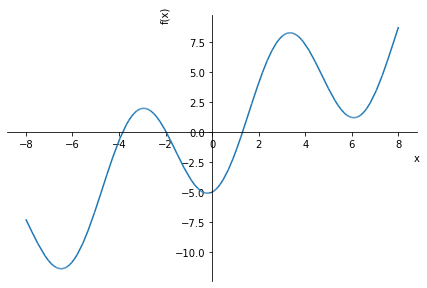

In [42]:
# %matplotlib notebook
plot(fun(x), (x,-8,8))

#### 3D plots

We can do 3D plots as well. Below we plot
$$f(x,y) = y \sin{(x)}$$

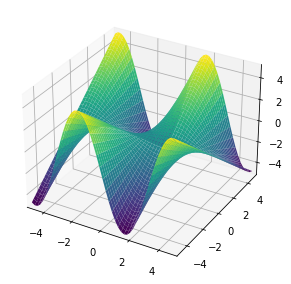

In [43]:
# %matplotlib notebook
plot3d(y*sin(x), (x,-5,5),(y,-5,5))

Here we plot:

$$f_1(x,y)= +\sqrt{x^2+y^2} $$
$$f_2(x,y)= -\sqrt{x^2+y^2} $$
which are the explicit solutions of:
$$x^2 + y^2 - z^2 = 0$$

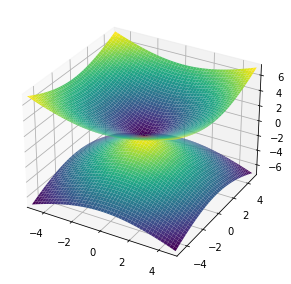

In [44]:
# %matplotlib notebook
plot3d(sqrt(x**2+y**2),-sqrt(x**2+y**2), (x,-5,5),(y,-5,5))

### Plot of implicit expressions

What if our curve or surface is given with an implicit formula?
Sympy can handle it.

#### 2D plots

Now we draw an circumference:
$$x^2 + y^2 = 16$$

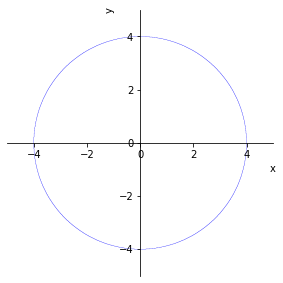

In [45]:
plot_implicit(Eq(x**2+y**2,16),(x,-5,5),(y,-5,5), aspect_ratio=(1,1))

Here an hyperbola:
$$x^2 - y^2 = 1$$

with asymptotes:
$$y = \pm x$$

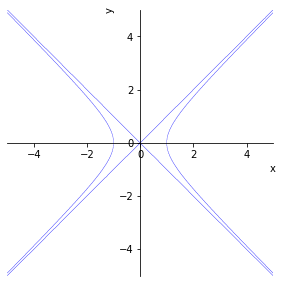

In [46]:
hyp = (x**2-y**2-1)
as1 = (y-x)
as2 = (y+x)

plot_implicit(Eq(hyp*as1*as2,0), (x,-5,5),(y,-5,5), aspect_ratio=(1,1))

### 3D plots

The implementation of implicit generic 3D plots is not always straightforward: it's not always possible to find an analytic expression for the folds $z(x,y)$. For instance, as we saw before:
$$x^2 + y^2 - z^2 = 0$$
can be plotted doing the usual plot for the 2 functions:

$$z(x,y)= +\sqrt{x^2+y^2} $$
$$z(x,y)= -\sqrt{x^2+y^2} $$

But how should we plot the following curve?

$$x^2 \, tan(yz) + log(x+z) \, \sqrt{y} + sin(z) = \frac{x}{z}$$

The trick here is to define function which can plot a class of 3D curves, such as the quadrics.


In [47]:
print("Here we define a quadric plotter.")
def plot3d_quadric(eq,x,a,b,y,c,d,z):
    sol = solve(eq,z) # solving for 'z'
    print("Plotting the following curves:")
    for s in sol: 
      display(Eq(z,s)) # displaying the solution
    plot3d(sol[0],sol[1],(x,a,b),(y,c,d)) # plotting the solution 

Here we define a quadric plotter.


Plotting the following curves:


Eq(z, -sqrt(-x**2 - y**2 + 16))

Eq(z, sqrt(-x**2 - y**2 + 16))

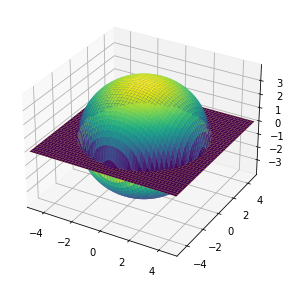

In [48]:
plot3d_quadric(x**2+y**2+z**2-16,x=x,a=-5,b=5,y=y,c=-5,d=5,z=z)

Eq(-x**2 - y**2 + z**2, 0)

Plotting the following curves:


Eq(z, -sqrt(x**2 + y**2))

Eq(z, sqrt(x**2 + y**2))

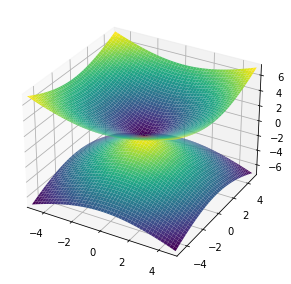

In [49]:
Q1 = z**2-x**2-y**2
display(Eq(Q1, 0))
plot3d_quadric(z**2-x**2-y**2,x,-5,5,y,-5,5,z)

Eq(x**2 + y**2 - z**2 - 1, 0)

Hyperboloid from the 2 z(x,y) curves:
Plotting the following curves:


Eq(z, -sqrt(x**2 + y**2 - 1))

Eq(z, sqrt(x**2 + y**2 - 1))

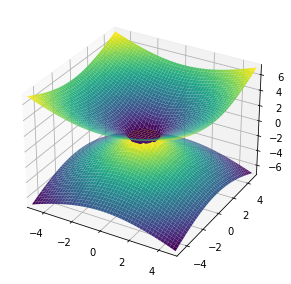

In [50]:
Q2 = x**2+y**2-z**2-1
display(Eq(Q2, 0))
print("Hyperboloid from the 2 z(x,y) curves:")
plot3d_quadric(Q2,x,-5,5,y,-5,5,z)

### Parametric plots

We can draw curves using the parametric representation:
$$\vec{r}(t) = \vec{f}(t)$$

Consider the simple case of a circumference of radius $R=1$. The parametrization is:

$$x(t) = \cos{(t)} $$
$$y(t) = \sin{(t)}$$

for $t \in [0,2\pi)$

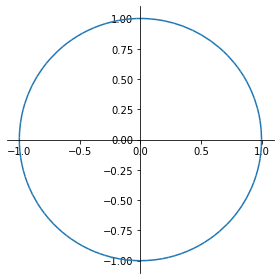

In [51]:
plot_parametric(cos(t),sin(t),(t,0,2*pi),aspect_ratio=(1,1))

Now let's dive in to some more complicated example: a [cardioid](https://en.wikipedia.org/wiki/Cardioid) with radius $a=1$.
This is the movement of a point of a circumference rounding up to another.

$$x(t) = (1 - \cos{(t)})\,\cos{(t)}$$
$$y(t) = (1 - \cos{(t)})\,\sin{(t)}$$


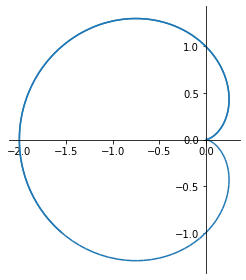

In [52]:
x_card = (1 - cos(t))*cos(t)
y_card = (1 - cos(t))*sin(t)
plot_parametric(x_card, y_card, (t,0,10), aspect_ratio=(1,1))

Now a cycloid:

$$x(t) = r(t - \sin{(t)})$$
$$y(t) = r(1 - \cos{(t)})$$

we choose $r=1$

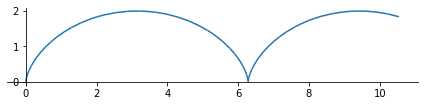

In [53]:
x_cycl = (t - sin(t))
y_cycl = (1 - cos(t))
plot_parametric(x_cycl, y_cycl, (t,0,10), aspect_ratio=(1,1))

Now we draw a spiral:
$$r(\theta) = A \theta$$

(we'll choose $A=1$)

How do we parametrize in terms of $x,y$ ?

$$x(t) = r(\theta) \cos{(\theta)} = A \theta \cos{(\theta)}$$
$$y(t) = r(\theta) \sin{(\theta)} = A \theta \sin{(\theta)}$$

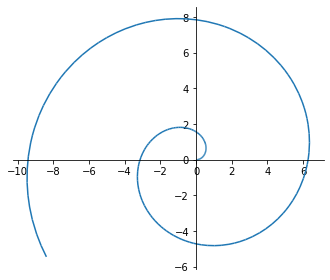

In [54]:
theta = symbols("theta")
x_spir = theta*cos(theta)
y_spir = theta*sin(theta)
plot_parametric(x_spir, y_spir, (theta,0, 10), aspect_ratio=(1,1))

## 3D plotting

We can plot in 3D. Let's start with a line:

$$x(t) =   -2t $$
$$y(t) = 3 + t $$
$$z(t) = 1 + t $$

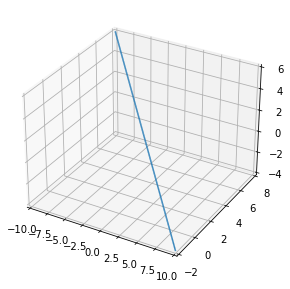

In [55]:
plot3d_parametric_line(-2*t, 3+t, 1+t, (t, -5, 5)) 

And last, but not least, an **helix**.
This is the motion of an electric charge with a magnetic field along the $z$ axis:
$$ x(t) = \cos{(t)} $$ 
$$ y(t) = \sin{(t)} $$ 
$$ z(t) = t $$ 


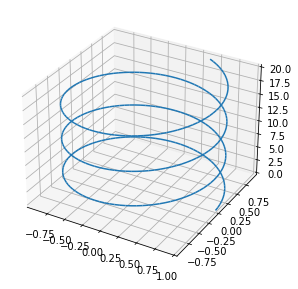

In [56]:
x_hel = cos(t)
y_hel = sin(t)
z_hel = t

plot3d_parametric_line(x_hel, y_hel, z_hel, (t, 0, 20))

### Hyperboloid as a ruled surface

Here we show how an hyperboloid can be drawn. We can use parametric plot utilities from sympy.plotting, or draw it from the straight lines that generate it.

Hyperboloid drawn as a parametric curve:


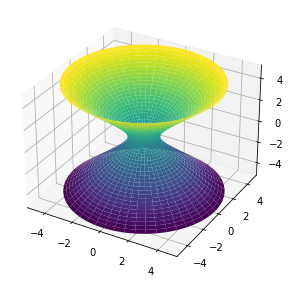

In [57]:
t,s = symbols('t, s')
a=b=c=1
from numpy import pi as pi
n=20
print("Hyperboloid drawn as a parametric curve:")
x_hyp = a*sqrt(1+t**2)*cos(s)
y_hyp = b*sqrt(1+t**2)*sin(s)
z_hyp = c*t
plot3d_parametric_surface(x_hyp,y_hyp, z_hyp, (t, -5, 5), (s,0,2*pi))

In order to draw the hyperboloid as a ruled surface, keep in mind the following image:

![HypRuled](./HyperboloidRuled.png)

Our steps are then:

* generate $n$ points along 2 circumferences, with some phase difference between the corresponding points
* draw a straight line connecting the couples of points of the circumference


In [58]:
print("We define here a function which draws a circumference on the xy plane at height z")
import numpy as np
def circ_points(n, phi, h):
  points = [] # list of points
  for i in range(0,n):
    theta = phi + i*(2*np.pi/n) 
    x = cos(theta)
    y = sin(theta)
    z = h
    points.append([x,y,z])
  return points
   
print("Check of the function:")
Pi = circ_points(10, 0.0, 0.0)
print(Pi)

We define here a function which draws a circumference on the xy plane at height z
Check of the function:
[[1, 0, 0.0], [0.809016994374947, 0.587785252292473, 0.0], [0.309016994374947, 0.951056516295154, 0.0], [-0.309016994374947, 0.951056516295154, 0.0], [-0.809016994374947, 0.587785252292473, 0.0], [-1.00000000000000, 1.22464679914735e-16, 0.0], [-0.809016994374948, -0.587785252292473, 0.0], [-0.309016994374948, -0.951056516295154, 0.0], [0.309016994374947, -0.951056516295154, 0.0], [0.809016994374947, -0.587785252292473, 0.0]]


In [59]:
print("Here we define a function that plot a line passing for A and B")
import numpy as np
def get_plot_line(A0,B0, I=[-5,5]):
  A = np.array(A0)
  B = np.array(B0)
  v = (A - B)
  t = symbols("t")
  rt = A + v*t
  return plot3d_parametric_line(rt[0], rt[1], rt[2], (t, I[0], I[1]), show=False)
  
  
print("testing")
p1 = get_plot_line([0,0,0],[1,2,3])
# p1.show()


Here we define a function that plot a line passing for A and B
testing


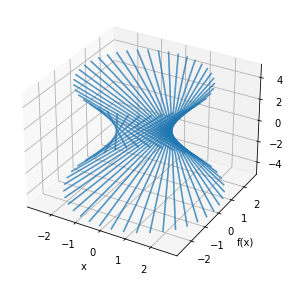

In [60]:
N = 40
phi = 0.5
h = 1
c1 = circ_points(N,0.0,0.0)
c2 = circ_points(N,phi,h)

P_hyp = sympy.plotting.plot(show=False)
for i in range(0,N):
    P_hyp.extend(get_plot_line(c1[i], c2[i]))
P_hyp.show()


Now we can think to automate the process:


In [61]:
print("Defining a function for generic hyperboloid as ruled surface")
def hyp_ruled(N, phi, h):
    c1 = circ_points(N,0.0,0.0)
    c2 = circ_points(N,phi,h)
    P_hyp = sympy.plotting.plot(show=False)
    for i in range(0,N):
        P_hyp.extend(get_plot_line(c1[i], c2[i]))
    P_hyp.show()
    

Defining a function for generic hyperboloid as ruled surface


Testing:


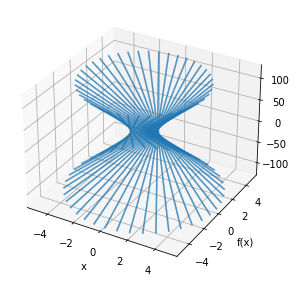

In [62]:
print("Testing:")

hyp_ruled(40, 1.0, 25)